In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

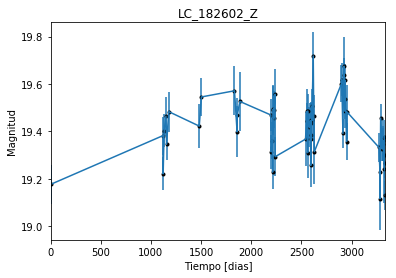

In [2]:
data = np.genfromtxt('LC_182602_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_182602_Z')
plt.savefig("LC_182602_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

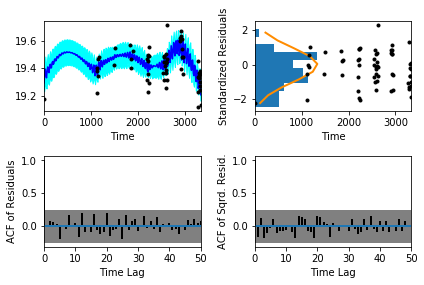

In [5]:
sample.assess_fit()

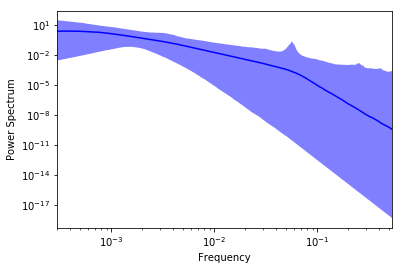

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

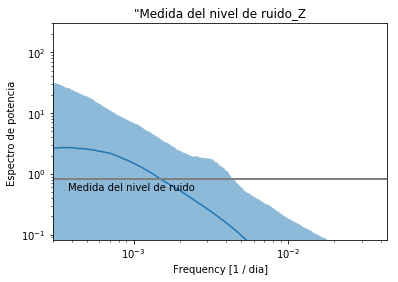

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_182602_Z')
plt.title('"Medida del nivel de ruido_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_182602_Z')

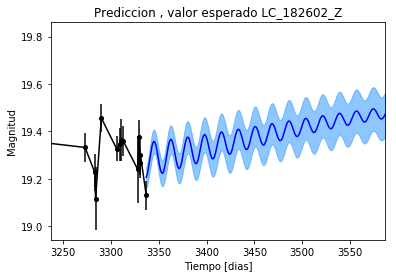

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_182602_Z')

Text(0.5,1,'Prediccion, Caminos simulados  LC_182602_Z')

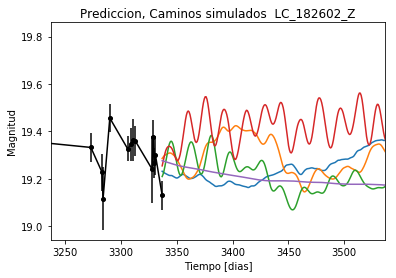

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_182602_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


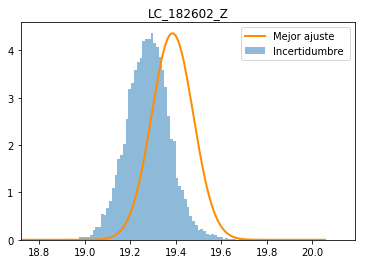

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_182602_Z')
plt.savefig("Mejor_ajuste_LC_182602_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_182602_Z')

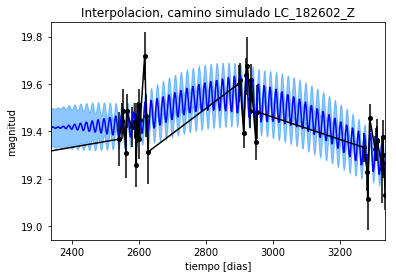

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_182602_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_182602_Z')

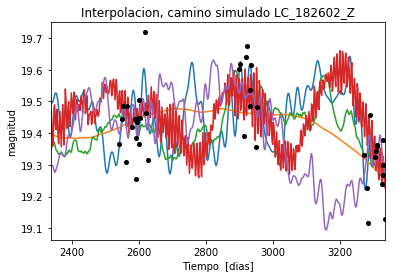

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_182602_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 649.907716533
Median: 0.0050698946693
Standard deviation: 0.170284701459
68% credibility interval: [ 0.0007648   0.10183138]
95% credibility interval: [  3.57960098e-04   7.10398693e-01]
99% credibility interval: [  3.13682057e-04   9.89098503e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 415.223576508
Median: 0.00208498241282
Standard deviation: 0.0826963421814
68% credibility interval: [ 0.00054022  0.02148439]
95% credibility interval: [ 0.00033403  0.20543722]
99% credibility interval: [  3.07649821e-04   6.69642571e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 362.750417219
Median: 0.0178306447371
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 256.891952258
Median: 78.7000261908
Standard deviation: 2.04953708254
68% credibility interval: [ 76.97775446  80.12623768]
95% credibility interval: [ 74.45913052  83.5018394 ]
99% credibility interval: [ 72.65114525  84.69188071]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 337.250779416
Median: 0.513791392362
Standard deviation: 2.09064302384
68% credibility interval: [ 0.04046758  3.45706469]
95% credibility interval: [ 0.01346171  6.85430513]
99% credibility interval: [  1.03456252e-02   1.07161823e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 216.671291456
Median: 0.410287940216
Standard deviation: 9.60789979323
68% credibility interval: [  0.03116025  11.11660941]
95% credibility interval: [  1

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 19269.9835053
Median: 2.70746913138e-10
Standard deviation: 1.86954740214e+59
68% credibility interval: [  4.32257922e-35   1.83737053e+24]
95% credibility interval: [  1.02971729e-53   5.40518459e+44]
99% credibility interval: [  4.96044196e-62   5.16946653e+57]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1317.58352016
Median: 19.4041396704
Standard deviation: 0.0628366852546
68% credibility interval: [ 19.34937546  19.44263867]
95% credibility interval: [ 19.24659119  19.49317725]
99% credibility interval: [ 19.13476542  19.54993445]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 481.692386316
Median: 0.0550513374657
Standard deviation: 0.264733438034
68% credibility interval: [ 0.          0.46058468]
95% credibility interval: [ 0.         0.9230594]
99% credibility interval: [ 0.          1.05093972]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 481.692386316
Median: 0.0550513374657
Standard deviation: 0.264733438034
68% credibility interval: [ 0.          0.46058468]
95% credibility interval: [ 0.         0.9230594]
99% credibility interval: [ 0.          1.05093972]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1810.28467592
Median: 0.0
Standard deviation: 0.00194292904721
68% credibi

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 256.891952258
Median: 78.7000261908
Standard deviation: 2.04953708254
68% credibility interval: [ 76.97775446  80.12623768]
95% credibility interval: [ 74.45913052  83.5018394 ]
99% credibility interval: [ 72.65114525  84.69188071]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 937.218977491
Median: 0.0123321880302
Standard deviation: 0.0184991031633
68% credibility interval: [ 0.00637432  0.02583838]
95% credibility interval: [ 0.00316355  0.05432702]
99% credibility interval: [ 0.00202009  0.12889709]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 430.861548459
Median: 1.16018306453
Standard deviation: 0.205338387185
68% credibility interval: [ 0.96566528  1.37458044]
95% credibility interval: [ 0.79615593  1.60222863]
99% credibility interval: [ 0.72151681  1.79163656]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 509.337207631
Median: 1.32169064724e-05
Standard deviation: 0.204187876684
68% credibility interval: [  5.69439958e-27   6.05937771e-03]
95% credibility interval: [  4.78600938e-48   4.38960012e-01]
99% credibility interval: [  1.05977466e-58   1.29545634e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 649.907716533
Median: (-0.0318550876951-1.57169570452j)
Standard deviation: 1.97776342769
68% credibility interval: [-0.63982543-0.46912912j -0.00480538-3.72159276j]
95% credibility interval: [ -4.46356663e+00+0.j         -2.24912963e-03-0.0183653j]
99% credibility interval: [ -6.21468918e+00+0.j          -1.97092249e-03-0.33740917j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 415.223576508
Median: (-0.013100330862+0j)
Standard deviation: 1.74263527982
68% credibility interval: [-0.13499038+0.30691721j -0.00339432+0.3077964j ]
95% credibility interval: [-1.29080015+5.96721552j -0.00209875+0.85944844j]
99% credibility interval: [ -4.20748837e+00+0.00683876j  -1.93302084e-03+0.00852673j]
Posterior summary for paramet